# 2. PV Power_Pattern_Analysis

## 임포트 하기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# '-'(마이너스) 기호 깨짐 예방
plt.rcParams['axes.unicode_minus'] = False

# jupyter notebook 에서 창 내부에 출력
%matplotlib inline

# 별도 창에 출력
# %matplotlib tk

In [2]:
df = pd.read_csv('./한국남부발전(주)_신인천소내 태양광발전실적_20220630_cleansing1.csv',encoding='cp949')
df


,년월일,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2021-01-01,0,0,0,0,0,0,0.0,0.0,0.0,...,111.366,27.432,14.391,5.689,0.000,0.0,0.0,0,0,0
1,2021-01-02,0,0,0,0,0,0,0.0,0.0,0.0,...,121.900,100.881,63.204,10.703,0.096,0.0,0.0,0,0,0
2,2021-01-03,0,0,0,0,0,0,0.0,0.0,0.0,...,59.950,26.323,18.368,10.558,0.145,0.0,0.0,0,0,0
3,2021-01-04,0,0,0,0,0,0,0.0,0.0,0.0,...,52.935,18.199,13.041,4.701,0.048,0.0,0.0,0,0,0
4,2021-01-05,0,0,0,0,0,0,0.0,0.0,0.0,...,88.828,44.064,45.342,13.186,0.072,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,0,0,0,0,0,0,0.0,0.0,0.0,...,16.078,6.508,0.747,7.545,0.096,0.0,0.0,0,0,0
361,2021-12-28,0,0,0,0,0,0,0.0,0.0,0.0,...,12.221,11.763,8.316,3.158,0.000,0.0,0.0,0,0,0
362,2021-12-29,0,0,0,0,0,0,0.0,0.0,0.0,...,100.881,78.752,15.500,5.110,0.096,0.0,0.0,0,0,0
363,2021-12-30,0,0,0,0,0,0,0.0,0.0,0.0,...,29.336,81.548,42.353,11.691,0.048,0.0,0.0,0,0,0


#### 1) 시계열 데이터로 변환

In [3]:
# object인 '년월일' 컬럼을 datetime형으로 변환하고 데이터프레임의 인덱스로 대입
df.index = pd.to_datetime(df['년월일'])
# 중복 컬럼 삭제
df = df.drop(['년월일'], axis=1)

#### 2) 시간대별 발전량 형식을 변환

In [4]:
#결럼을 인덴스로 보냄
df.stack()

년월일           
2021-01-01  0     0.0
            1     0.0
            2     0.0
            3     0.0
            4     0.0
                 ... 
2021-12-31  19    0.0
            20    0.0
            21    0.0
            22    0.0
            23    0.0
Length: 8760, dtype: float64

In [5]:
#데이터프레임이 Series로 바뀜
type(df.stack())

pandas.core.series.Series

In [6]:
#멀티인덱스 가짐
df.stack().index

MultiIndex([('2021-01-01',  '0'),
            ('2021-01-01',  '1'),
            ('2021-01-01',  '2'),
            ('2021-01-01',  '3'),
            ('2021-01-01',  '4'),
            ('2021-01-01',  '5'),
            ('2021-01-01',  '6'),
            ('2021-01-01',  '7'),
            ('2021-01-01',  '8'),
            ('2021-01-01',  '9'),
            ...
            ('2021-12-31', '14'),
            ('2021-12-31', '15'),
            ('2021-12-31', '16'),
            ('2021-12-31', '17'),
            ('2021-12-31', '18'),
            ('2021-12-31', '19'),
            ('2021-12-31', '20'),
            ('2021-12-31', '21'),
            ('2021-12-31', '22'),
            ('2021-12-31', '23')],
           names=['년월일', None], length=8760)

In [7]:
print(df.stack().index[0][0])
print(df.stack().index[1][1])

2021-01-01 00:00:00
1


In [8]:
#df.stack().columns

In [9]:
# 인덱스 값을 컬럼으로 바꿈
df.stack().unstack()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
년월일,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.568,...,111.366,27.432,14.391,5.689,0.000,0.0,0.0,0.0,0.0,0.0
2021-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.146,...,121.900,100.881,63.204,10.703,0.096,0.0,0.0,0.0,0.0,0.0
2021-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.026,...,59.950,26.323,18.368,10.558,0.145,0.0,0.0,0.0,0.0,0.0
2021-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.821,...,52.935,18.199,13.041,4.701,0.048,0.0,0.0,0.0,0.0,0.0
2021-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.519,...,88.828,44.064,45.342,13.186,0.072,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.605,...,16.078,6.508,0.747,7.545,0.096,0.0,0.0,0.0,0.0,0.0
2021-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.676,...,12.221,11.763,8.316,3.158,0.000,0.0,0.0,0.0,0.0,0.0
2021-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.097,...,100.881,78.752,15.500,5.110,0.096,0.0,0.0,0.0,0.0,0.0


In [10]:
#시간대별 발전량 추출
dat= df.stack().values
dat

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
# 날짜 시간 정보 만들기
idx = pd.date_range('2021-01-01 00:00:00','2021-12-31 23:00:00', freq='H')
idx

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

In [15]:
# 시간대별 발전량 데이터
df2 = pd.DataFrame(data=dat, index=idx, columns=['PV'])
df2.index.name = 'datetime'
df2

,PV
datetime,
2021-01-01 00:00:00,0.0
2021-01-01 01:00:00,0.0
2021-01-01 02:00:00,0.0
2021-01-01 03:00:00,0.0
2021-01-01 04:00:00,0.0
...,...
2021-12-31 19:00:00,0.0
2021-12-31 20:00:00,0.0
2021-12-31 21:00:00,0.0


In [16]:
df2.to_csv('한국남부발전(주)_신인천소내 태양광발전실적_2021_1H_.csv',encoding= 'cp949')

## 3. 데이터 및 분석

#### 1) 시대별 생산량

Text(0.5, 1.0, '2021년 시간대별 발전량')

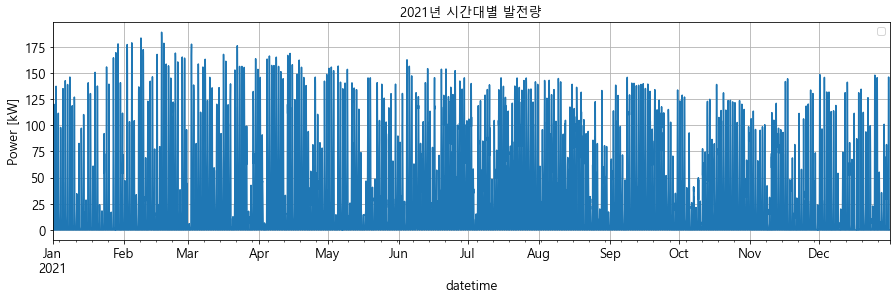

In [17]:
# 2021년 연중 PV 발전 패턴
df2.plot(figsize=(15,4), fontsize = 13)
plt.grid()
plt.legend([])
plt.xlabel('datetime', fontsize = 13)
plt.ylabel('Power [kW]', fontsize = 13)
plt.title('2021년 시간대별 발전량', fontsize = 13)

Text(0.5, 1.0, '2021년 1월 시간대별 발전량')

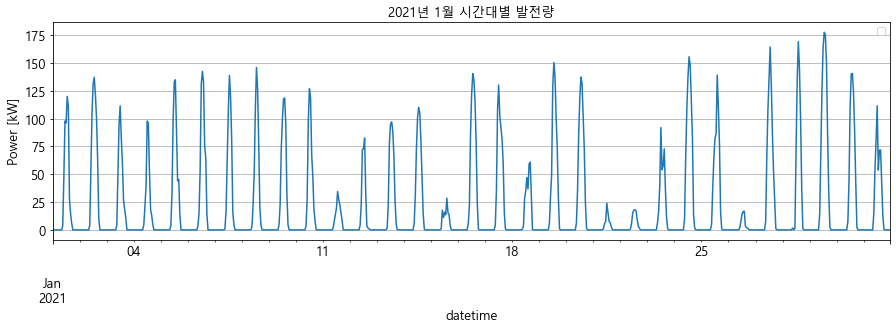

In [18]:
# 2021년 월 PV 발전 패턴
df2.loc['2021-1'].plot(figsize=(15,4), fontsize = 13)
plt.grid()
plt.legend([])
plt.xlabel('datetime', fontsize = 13)
plt.ylabel('Power [kW]', fontsize = 13)
plt.title('2021년 1월 시간대별 발전량', fontsize = 13)

Text(0.5, 1.0, '2021년 하루 시간대별 발전량')

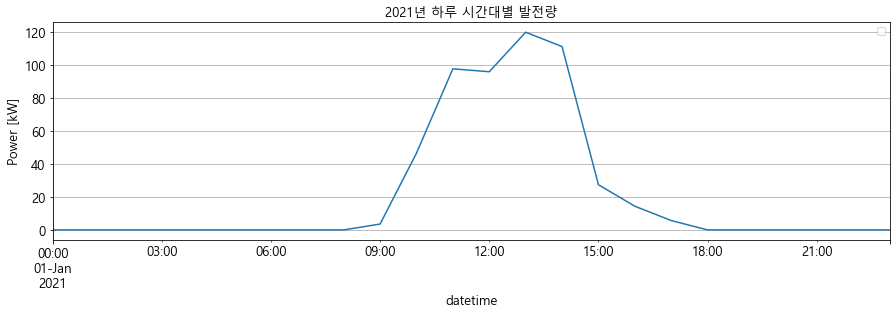

In [19]:
# 일 PV 발전 패턴
df2.loc['2021-1-1'].plot(figsize=(15,4), fontsize = 13)
plt.grid()
plt.legend([])
plt.xlabel('datetime', fontsize = 13)
plt.ylabel('Power [kW]', fontsize = 13)
plt.title('2021년 하루 시간대별 발전량', fontsize = 13)

#### 2) 발전량이 가장 많은 날은?

In [21]:
# 최대 발전량
df2['PV'].max()

188.841

In [22]:
# 최대 발전한 날짜
df2['PV'].idxmax()

Timestamp('2021-02-17 13:00:00', freq='H')

In [23]:
# 년월일 추출
max_time_day = df2['PV'].idxmax().strftime('%Y-%m-%d')
max_time_day

'2021-02-17'

Text(0.5, 1.0, '최대 발전 (시간)')

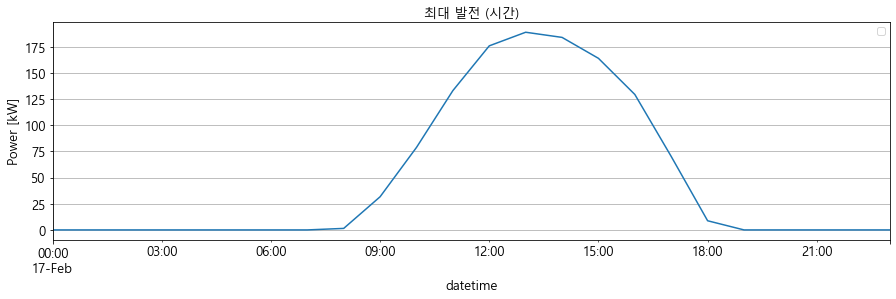

In [24]:
# 최대 발전 시간 및 발전량
df2.loc[max_time_day].plot(figsize=(15,4), fontsize = 13)
plt.grid()
plt.legend([])
plt.xlabel('datetime', fontsize = 13)
plt.ylabel('Power [kW]', fontsize = 13)
plt.title('최대 발전 (시간)', fontsize = 13)

In [25]:
# 일일 발전량
df2['PV'].resample('D').sum()

datetime
2021-01-01    523.012
2021-01-02    728.003
2021-01-03    456.868
2021-01-04    348.995
2021-01-05    593.977
               ...   
2021-12-27    197.132
2021-12-28    135.109
2021-12-29    434.063
2021-12-30    381.273
2021-12-31    806.444
Freq: D, Name: PV, Length: 365, dtype: float64

Text(0.5, 1.0, '일일 발전량')

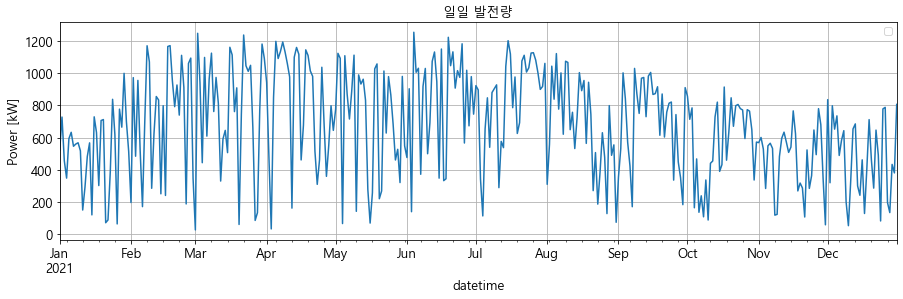

In [26]:
# 일일 발전량
df2['PV'].resample('D').sum().plot(figsize=(15,4), fontsize = 13)
plt.grid()
plt.legend([])
plt.xlabel('datetime', fontsize = 13)
plt.ylabel('Power [kW]', fontsize = 13) 
plt.title('일일 발전량', fontsize = 13)

In [27]:
df2['PV'].resample('D').sum().index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='datetime', length=365, freq='D')

#### 일일 최대 발전량

In [28]:
# 일일 최대 발전량
df2['PV'].resample('D').sum().max()

1254.27

In [29]:
# 일일 최대 발전한 날짜
max_day = df2['PV'].resample('D').sum().idxmax().strftime('%Y-%m-%d')
max_day

'2021-06-04'

Text(0.5, 1.0, '일일 최대 발전량')

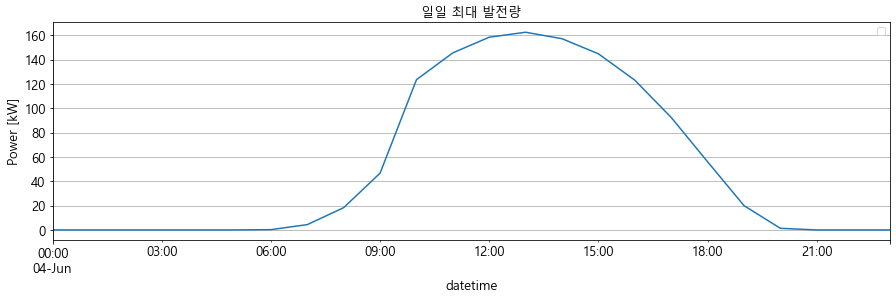

In [30]:
# 일일 최대 발전량
df2.loc[max_day].plot(figsize=(15,4), fontsize = 13)
plt.grid()
plt.legend([])
plt.xlabel('datetime', fontsize = 13)
plt.ylabel('Power [kW]', fontsize = 13)
plt.title('일일 최대 발전량', fontsize = 13)

#### 일일 최대 발전량과 피크 발전한 날의 비교

Text(0.5, 1.0, '일일 최대 발전량')

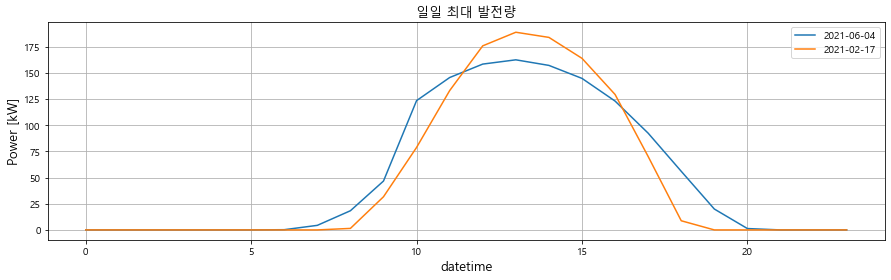

In [31]:
plt.figure(figsize=(15,4))
plt.plot(df2.loc[max_day].values, label=max_day)
plt.plot(df2.loc[max_time_day].values, label=max_time_day)
plt.grid()
plt.legend()
plt.xlabel('datetime', fontsize = 13)
plt.ylabel('Power [kW]', fontsize = 13)
plt.title('일일 최대 발전량', fontsize = 13)

### 3) 발전량이 가장 많은 달과 적은 달은?

In [32]:
# 월별 발전량
monthly = df2['PV'].resample('M').sum()

Text(0.5, 1.0, '월별 발전량')

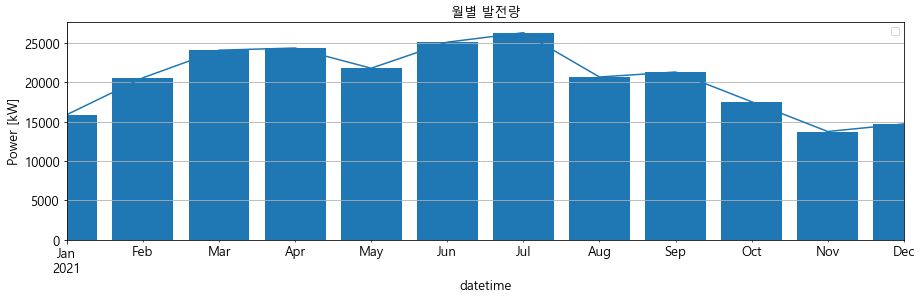

In [33]:
# 월별 발전량
monthly.plot(figsize=(15,4), fontsize = 13).bar(x=monthly.index, height=monthly.values)
plt.grid()
plt.legend([])
plt.xlabel('datetime', fontsize = 13)
plt.ylabel('Power [kW]', fontsize = 13)
plt.title('월별 발전량', fontsize = 13)

In [34]:
# 월 최대 발전량
monthly.max()

26322.998

In [35]:
# 최대 발전한 달
max_month = monthly.idxmax().strftime('%Y-%m')
max_month

'2021-07'

Text(0.5, 1.0, '월 최대 발전량')

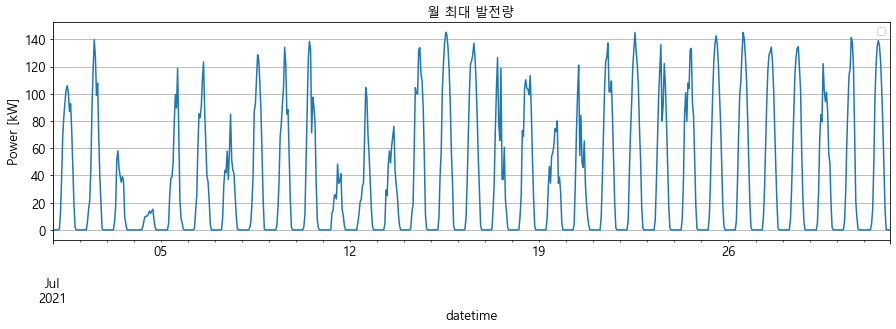

In [36]:
# 월 최대 발전량 패턴
df2.loc[max_month].plot(figsize=(15,4), fontsize = 13)
plt.grid()
plt.legend([])
plt.xlabel('datetime', fontsize = 13)
plt.ylabel('Power [kW]', fontsize = 13)
plt.title('월 최대 발전량', fontsize = 13)

In [38]:
# 월 최소 발전량
monthly.min()

13765.981

In [39]:
# 최소 발전한 달
min_month = monthly.idxmin().strftime('%Y-%m')
min_month

'2021-11'

Text(0.5, 1.0, '월 최소 발전량')

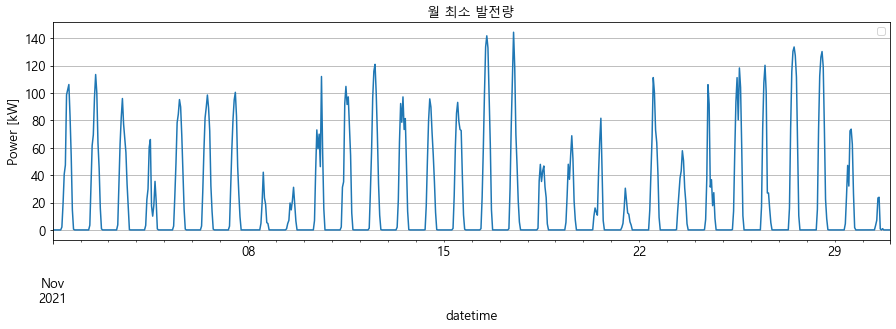

In [40]:
# 월 최소 발전량 패턴
df2.loc[min_month].plot(figsize=(15,4), fontsize = 13)
plt.grid()
plt.legend([])
plt.xlabel('datetime', fontsize = 13)
plt.ylabel('Power [kW]', fontsize = 13)
plt.title('월 최소 발전량', fontsize = 13)

Text(0.5, 1.0, '월 최대/최소 발전량')

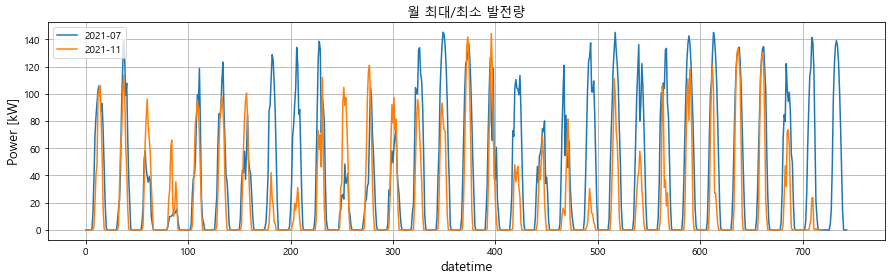

In [41]:
# 월 최대/최소 발전량 패턴 비교
plt.figure(figsize=(15,4))
plt.plot(df2.loc[max_month].values, label=max_month)
plt.plot(df2.loc[min_month].values, label=min_month)
plt.grid()
plt.legend()
plt.xlabel('datetime', fontsize = 13)
plt.ylabel('Power [kW]', fontsize = 13)
plt.title('월 최대/최소 발전량', fontsize = 13)

#### 월 최대/최소 발전량 차이

In [42]:
# 7월은 31일, 11월은 30일
df2.loc[max_month].values.shape, df2.loc[min_month].values.shape

((744, 1), (720, 1))

In [43]:
# 자료형 확인
type(df2.loc[min_month].values)

numpy.ndarray

In [44]:
import numpy as np

In [45]:
# '0'을 24개 생성
np.zeros(24)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [46]:
# 데이터 크기 확인
np.zeros(24).shape

(24,)

In [47]:
# 데이터 크기 변환: 1차원 -> 2차원
np.zeros(24).reshape(24,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [50]:
#배열 결합
np.concatenate((df2.loc[min_month].values, np.zeros(24).reshape(24,1)), axis=0)[720-24:]

array([[ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.024],
       [ 3.302],
       [ 7.063],
       [23.358],
       [23.864],
       [ 0.723],
       [ 0.   ],
       [ 0.916],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ]])

In [51]:
# 월 최대/최소 발전량 차이
x1 = df2.loc[max_month].values
x2 = np.concatenate((df2.loc[min_month].values, np.zeros(24).reshape(24,1)), axis=0)
dif = x1 - x2
dif[:10]

array([[ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.506],
       [11.643],
       [35.218],
       [49.392]])

Text(0.5, 1.0, '월 최대/최소 발전량 차이')

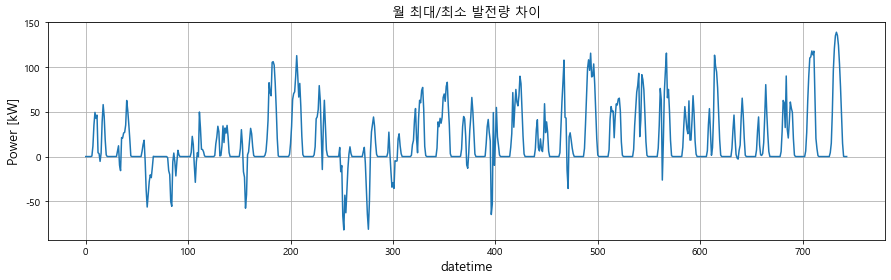

In [52]:
plt.figure(figsize=(15,4))
plt.plot(dif)
plt.grid()
plt.xlabel('datetime', fontsize = 13)
plt.ylabel('Power [kW]', fontsize = 13)
plt.title('월 최대/최소 발전량 차이', fontsize = 13)